In [7]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [8]:
#Loading the training and validation datasets
train_data = pd.read_csv("/content/twitter_training.csv")
validation_data = pd.read_csv("/content/twitter_validation.csv")

In [9]:
train_head = train_data.head()
validation_head = validation_data.head()

train_head, validation_head

(   2401  Borderlands  Positive  \
 0  2401  Borderlands  Positive   
 1  2401  Borderlands  Positive   
 2  2401  Borderlands  Positive   
 3  2401  Borderlands  Positive   
 4  2401  Borderlands  Positive   
 
   im getting on borderlands and i will murder you all ,  
 0  I am coming to the borders and I will kill you...     
 1  im getting on borderlands and i will kill you ...     
 2  im coming on borderlands and i will murder you...     
 3  im getting on borderlands 2 and i will murder ...     
 4  im getting into borderlands and i can murder y...     ,
    3364   Facebook Irrelevant  \
 0   352     Amazon    Neutral   
 1  8312  Microsoft   Negative   
 2  4371      CS-GO   Negative   
 3  4433     Google    Neutral   
 4  6273       FIFA   Negative   
 
   I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy,

In [10]:
train_data.columns=['TweetID','entity','sentiment','Tweet content']
train_data.head()

,TweetID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [11]:
validation_head.columns=['TweetID','entity','sentiment','Tweet content']
validation_head.head()

,TweetID,entity,sentiment,Tweet content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [12]:
from textblob import TextBlob

# Perform sentiment analysis on the training dataset
train_data['Positive'] = train_data.iloc[:, 3].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Perform sentiment analysis on the validation dataset
validation_data['Negative'] = validation_data.iloc[:, 3].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [13]:
print(train_data.columns)
print(validation_data.columns)

Index(['TweetID', 'entity', 'sentiment', 'Tweet content', 'Positive'], dtype='object')
Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣',
       'Negative'],
      dtype='object')


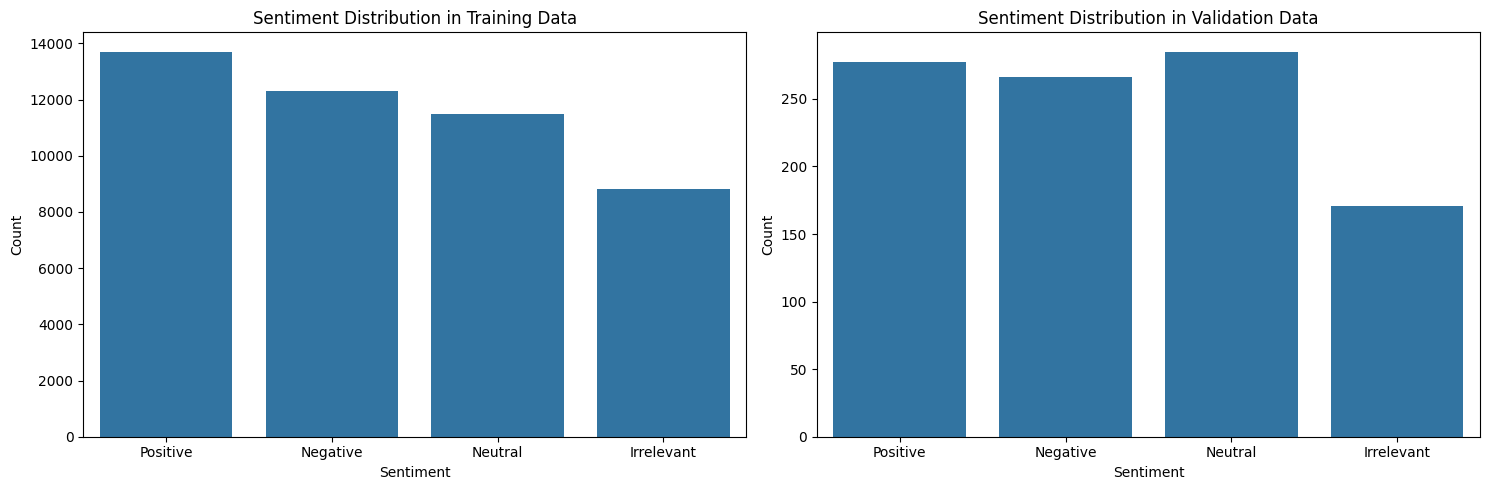

In [14]:
#Setting up the plots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#Plotting sentiment distribution for training data
sns.countplot(data=train_data, x=train_data.columns[2], order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax=ax[0])
ax[0].set_title('Sentiment Distribution in Training Data')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Sentiment')

#Plotting sentiment distribution for validation data
sns.countplot(data=validation_data, x=validation_data.columns[2], order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax=ax[1])
ax[1].set_title('Sentiment Distribution in Validation Data')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Sentiment')

plt.tight_layout()
plt.show()

<ipython-input-15-2b767741de0c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y=train_data.columns[1], order=train_data[train_data.columns[1]].value_counts().index, palette='viridis')


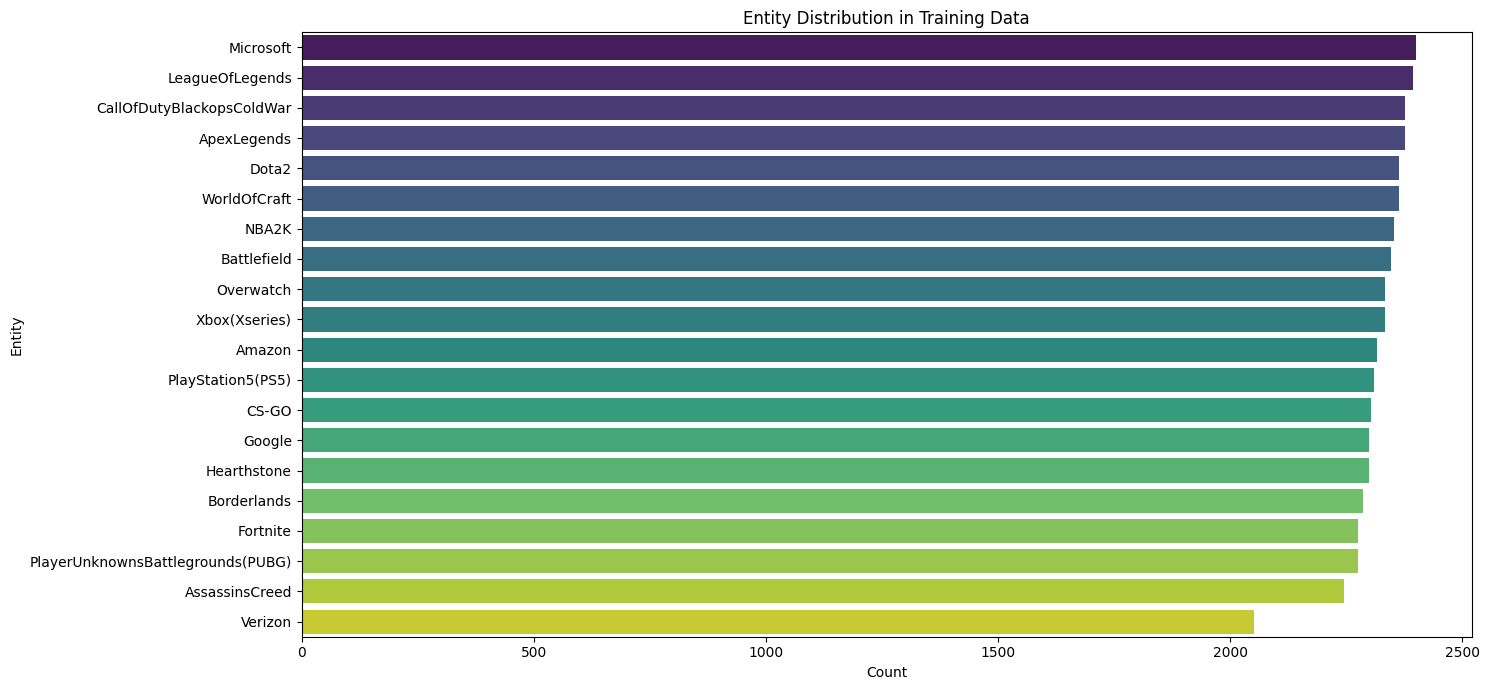

In [15]:
#Setting up the plot
plt.figure(figsize=(15, 7))

#Plotting entity distribution for training data
sns.countplot(data=train_data, y=train_data.columns[1], order=train_data[train_data.columns[1]].value_counts().index, palette='viridis')
plt.title('Entity Distribution in Training Data')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.tight_layout()
plt.show()

In [16]:
#Generating the word cloud for the entire training dataset
all_text="".join(tweet for tweet in train_data[train_data.columns[3]].astype(str))
wordcloud_all = WordCloud(background_color='white', width=800, height=400).generate(all_text)

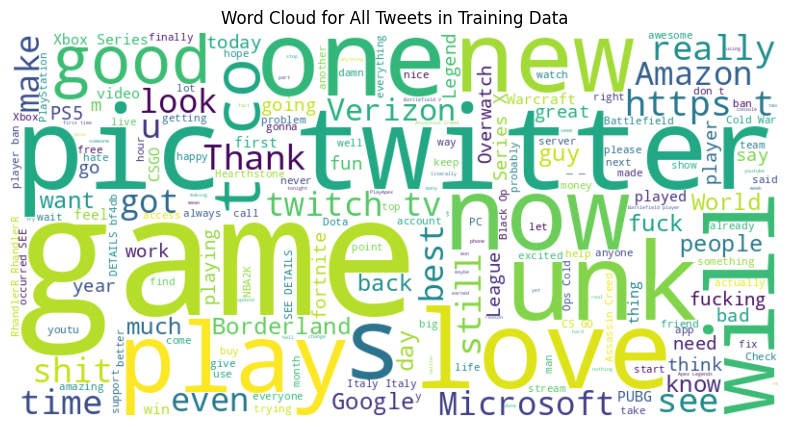

In [17]:
#Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All Tweets in Training Data')
plt.show()

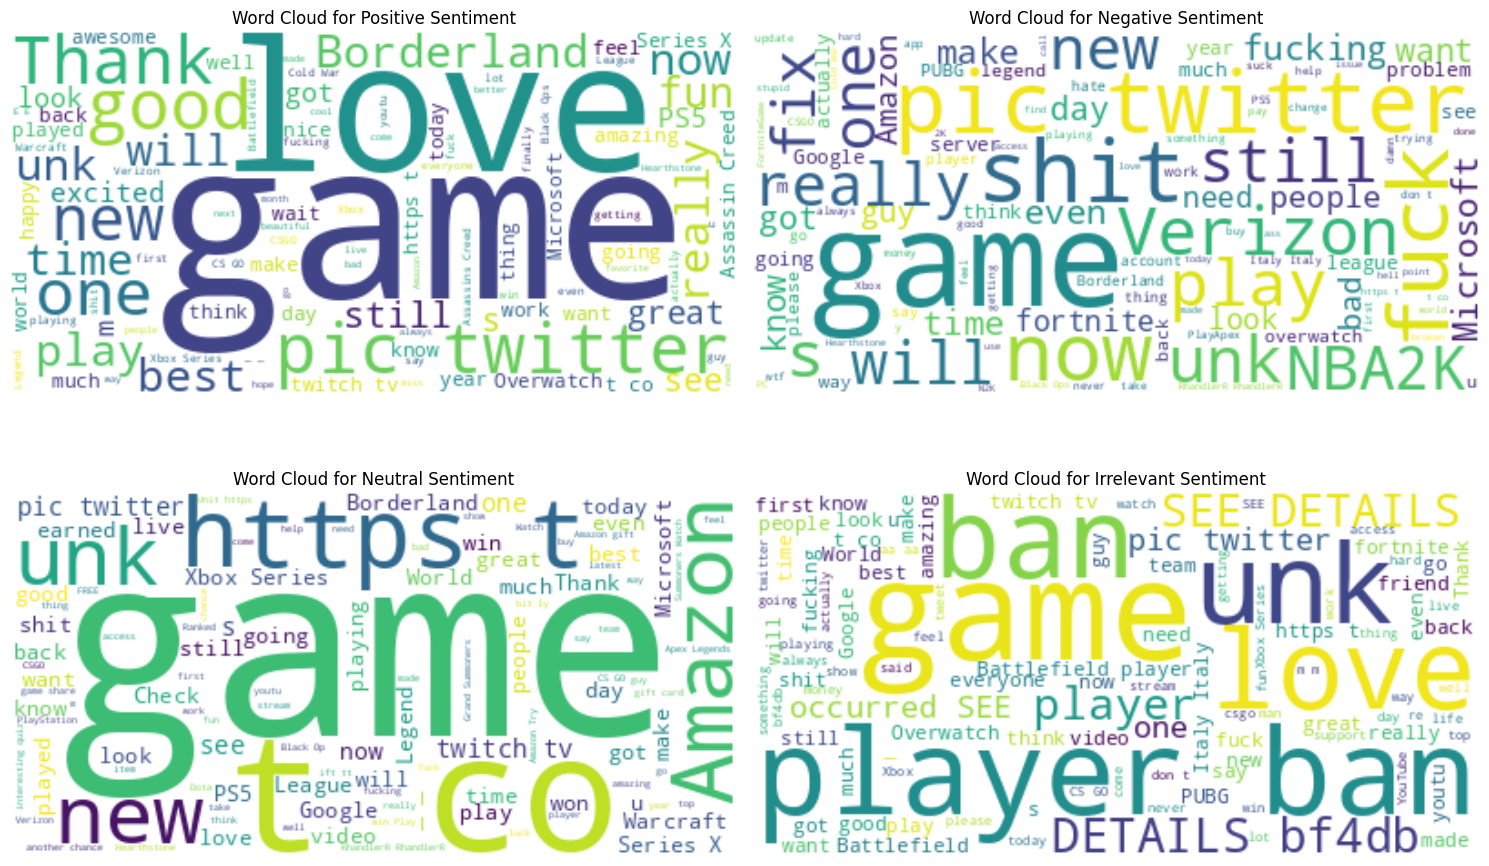

In [18]:
#Initializing sentiment categories
sentiments = ['Positive', 'Negative', 'Neutral', 'Irrelevant']

#Setting up the plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

#Generating and plotting word clouds for each sentiment
for sentiment, ax in zip(sentiments, axs.ravel()):
  sentiment_text = " ".join(str(tweet) for tweet in train_data[train_data[train_data.columns[2]] == sentiment][train_data.columns[3]])
  wordcloud_sentiment = WordCloud(background_color='white', width=400, height=200).generate(sentiment_text)

  ax.imshow(wordcloud_sentiment, interpolation='bilinear')
  ax.axis('off')
  ax.set_title(f'Word Cloud for {sentiment} Sentiment')

plt.tight_layout()
plt.show()